In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns

from sklearn import preprocessing
pd.set_option('display.max_columns', None)
pd.reset_option('display.min_rows', None)

In [3]:
df = pd.read_csv('cap_data_final3.csv')
Areas = pd.read_csv('Areas.csv')
#pop = pd.read_csv('demographics.csv')
#pop = pd.DataFrame(pop['total_pop'])

In [4]:
#creating percent dem out of pct_won
df.loc[df.party == 'R', ['pct_won']] = 100 - df.loc[df.party == 'R', ['pct_won']]

In [5]:
df

,district,state,abbreviation,state_dist,year,laborforce_unemployed,PercentCar,PercentCarpool,PercentPublicTrans,Walked,Other_means,Management_business_science_and_arts,Service,Sales_and_office,Natural_resources_construction_and_maintenance,Production_transportation_and_material_moving,Private_wage_and_salary_workers,Government_workers,Less_than_10000,Median_household_income,No_health_insurance,non_fam_household,college_enroll,vet_percent,diff_house_1year,foreign_born,ForeignNotCit,ForeignCit,home_lang_not_english,own_computer,total_pop,median_age,white_pct,black_pct,amer_ind,asianpac,hispanic_pct,PctU20,Pct20t45,Pct45t65,Pct65plus,U25k,r25k_50k,r50k_100k,r100k_200k,r200kplus,NoHighSchool,HighSchoolEd,SomeCollege,BachelorsOrHigher,pct_won,party
0,1,Alabama,AL,AL-1,2014,4.7,87.3,7.2,0.4,0.8,1.0,31.5,17.2,26.8,10.0,14.5,79.5,15.2,9.8,44030,13.7,32.7,22.5,9.8,12.2,3.0,1.6170,1.3830,4.9,76.9,696783,39.5,67.2,27.9,0.8,1.4,3.1,25.9,30.9,27.0,16.2,29.8,25.8,28.1,13.8,2.5,13.5,32.7,30.7,23.1,31.84,R
1,2,Alabama,AL,AL-2,2014,5.2,85.1,9.0,0.4,1.2,1.3,31.6,17.3,24.9,10.4,15.7,75.2,18.6,9.9,42628,11.8,34.3,24.7,11.0,15.4,2.6,1.6718,0.9282,3.9,78.1,678622,38.0,65.4,30.9,0.5,1.1,3.2,25.7,33.0,25.7,15.5,30.2,27.3,27.6,12.8,2.0,16.4,32.4,29.5,21.6,32.66,R
2,3,Alabama,AL,AL-3,2014,5.2,86.3,8.4,0.4,1.2,1.1,30.8,16.3,24.4,10.0,18.5,78.3,17.1,11.7,40896,10.8,32.5,32.3,9.3,16.4,3.0,2.0820,0.9180,4.0,79.5,706574,38.0,69.7,26.0,0.3,1.5,3.0,25.8,33.6,25.7,15.0,31.6,27.1,27.2,12.2,2.0,16.6,33.0,30.1,20.4,33.88,R
3,4,Alabama,AL,AL-4,2014,4.1,86.1,9.6,0.3,0.8,0.6,28.1,17.1,21.8,12.1,21.0,77.8,15.3,9.1,39246,13.6,30.4,18.3,8.7,13.0,3.4,2.5704,0.8296,5.4,75.5,683372,40.9,87.3,6.9,0.7,0.5,6.0,25.6,30.0,27.2,17.1,33.4,26.8,27.7,10.5,1.5,19.3,35.1,29.3,16.3,1.43,R
4,5,Alabama,AL,AL-5,2014,4.6,87.2,6.9,0.4,1.3,1.3,38.4,16.1,22.5,9.1,13.8,77.2,17.4,8.6,49202,12.0,33.1,27.3,10.8,14.9,4.2,2.4528,1.7472,5.8,81.8,706373,39.4,76.8,17.2,0.6,1.5,5.0,25.0,32.2,27.8,15.0,25.7,24.9,27.8,17.7,3.8,14.0,26.6,29.9,29.5,25.58,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,6,Wisconsin,WI,WI-6,2018,2.0,84.8,7.1,0.3,2.2,1.5,33.1,15.8,19.7,9.5,22.0,85.1,10.1,4.4,59868,4.8,37.4,24.2,8.0,13.4,3.4,1.4892,1.9108,5.9,89.9,714886,41.9,92.3,2.1,0.5,2.4,4.7,23.1,30.1,28.3,18.5,18.3,23.1,34.9,19.4,4.3,7.6,33.5,33.3,25.5,44.53,R
1301,8,Wisconsin,WI,WI-8,2018,1.6,84.8,7.4,0.4,2.0,0.8,34.8,15.5,19.6,9.7,20.5,84.3,10.1,3.7,61423,5.0,34.2,20.6,7.8,10.9,4.0,2.1000,1.9000,7.3,90.8,735997,40.7,90.0,1.6,2.6,2.1,5.4,24.8,30.0,27.9,17.1,16.6,23.0,35.2,21.0,4.2,7.2,34.6,31.8,26.4,36.31,R
1302,0,Wyoming,WY,WY-0,2014,2.9,76.8,11.0,1.6,3.6,2.2,32.7,18.3,20.8,15.6,12.6,73.9,19.7,5.3,57055,12.0,35.9,26.5,10.2,17.4,3.8,2.4852,1.3148,7.0,88.4,584153,36.6,91.0,1.1,2.6,1.0,9.8,26.1,33.8,26.4,13.8,20.6,23.5,32.0,20.6,3.3,7.5,27.4,38.6,26.6,33.95,R
1303,0,Wyoming,WY,WY-0,2016,3.7,77.8,9.0,1.5,4.6,1.3,33.0,18.4,20.8,15.7,12.0,73.2,20.1,5.2,59882,11.5,34.9,26.3,10.7,17.7,3.2,1.9456,1.2544,7.6,90.8,585501,37.2,92.0,1.0,2.3,1.1,9.6,26.8,32.6,25.6,15.0,19.6,23.5,31.9,21.3,3.8,6.9,29.3,36.8,27.1,39.65,R


In [6]:
df['pctDem'] = df['pct_won']

In [7]:
df.loc[df['pctDem'] == 0]
#df.loc[df['pctDem'] == 100]

,district,state,abbreviation,state_dist,year,laborforce_unemployed,PercentCar,PercentCarpool,PercentPublicTrans,Walked,Other_means,Management_business_science_and_arts,Service,Sales_and_office,Natural_resources_construction_and_maintenance,Production_transportation_and_material_moving,Private_wage_and_salary_workers,Government_workers,Less_than_10000,Median_household_income,No_health_insurance,non_fam_household,college_enroll,vet_percent,diff_house_1year,foreign_born,ForeignNotCit,ForeignCit,home_lang_not_english,own_computer,total_pop,median_age,white_pct,black_pct,amer_ind,asianpac,hispanic_pct,PctU20,Pct20t45,Pct45t65,Pct65plus,U25k,r25k_50k,r50k_100k,r100k_200k,r200kplus,NoHighSchool,HighSchoolEd,SomeCollege,BachelorsOrHigher,pct_won,party,pctDem
272,12,Florida,FL,FL-12,2014,3.5,81.7,7.1,0.5,1.0,2.4,39.7,17.2,27.8,7.6,7.7,83.0,11.7,5.9,50835,12.6,34.2,24.6,11.7,11.5,10.7,4.0446,6.6554,16.2,85.9,729937,44.6,88.0,5.2,0.2,2.9,13.0,22.5,27.9,27.9,21.5,23.4,25.7,29.3,17.2,4.3,10.0,29.6,32.2,28.2,0.0,R,0.0
285,25,Florida,FL,FL-25,2014,4.0,79.6,9.6,2.3,1.0,1.1,29.0,18.6,28.0,13.0,11.5,84.0,9.4,7.4,49544,22.7,22.5,27.1,3.0,9.4,52.5,24.4125,28.0875,72.4,85.3,745358,39.5,85.5,7.3,0.2,2.3,70.8,24.0,33.8,26.4,15.7,26.0,24.4,29.9,16.1,3.7,18.9,29.0,25.5,26.6,0.0,R,0.0
287,27,Florida,FL,FL-27,2014,4.9,77.7,9.0,5.4,2.1,1.7,32.0,20.1,27.1,10.5,10.3,82.8,8.3,9.6,43957,21.3,31.5,31.3,2.3,9.8,55.4,26.7582,28.6418,76.6,81.1,760443,39.9,87.3,7.2,0.1,1.8,76.1,22.9,34.8,25.9,16.4,30.5,24.3,24.1,13.9,7.1,20.2,28.5,22.1,29.2,0.0,R,0.0
344,3,Georgia,GA,GA-3,2014,5.2,82.1,11.3,0.6,1.0,1.7,32.0,17.5,25.3,9.9,15.4,78.1,16.6,8.5,49833,13.4,28.8,23.3,10.5,15.7,5.2,2.7872,2.4128,7.0,84.5,725530,37.0,69.4,24.4,0.2,2.1,5.2,28.1,32.5,25.8,13.7,24.8,25.5,30.5,16.1,3.4,14.4,30.8,30.2,24.5,0.0,R,0.0
352,11,Georgia,GA,GA-11,2014,4.4,78.1,10.0,1.1,0.9,3.0,40.6,16.0,26.1,8.2,9.0,83.0,11.2,4.5,65837,14.9,30.5,26.6,8.1,17.6,12.3,7.6506,4.6494,15.8,93.0,725169,35.9,73.1,17.6,0.1,3.4,10.8,27.1,35.9,26.1,11.0,15.8,21.6,32.9,22.0,7.8,10.9,22.3,27.9,38.8,0.0,R,0.0
355,14,Georgia,GA,GA-14,2014,4.5,84.9,8.6,0.2,1.6,1.3,27.2,15.4,25.2,10.9,21.3,81.7,13.3,7.3,46170,15.3,26.6,19.7,7.8,11.2,7.2,4.9320,2.2680,11.0,81.0,700856,37.2,85.0,9.7,0.2,1.0,11.0,28.2,32.9,25.5,13.5,26.8,27.0,30.6,13.4,2.1,20.0,33.6,29.0,17.4,0.0,R,0.0
364,9,Georgia,GA,GA-9,2016,2.3,82.2,10.3,0.3,1.1,1.1,29.9,16.5,24.1,11.4,18.1,81.7,12.3,7.3,50154,14.3,28.5,21.5,8.4,11.6,7.6,5.4872,2.1128,13.3,84.9,736075,40.8,87.2,7.2,0.2,1.1,12.4,25.9,29.4,26.9,17.8,24.5,25.4,31.4,15.8,3.0,19.2,32.9,26.3,21.6,0.0,R,0.0
369,14,Georgia,GA,GA-14,2016,3.4,83.5,9.7,0.3,0.9,1.0,27.5,15.3,23.6,11.8,21.7,83.1,11.7,6.5,48691,13.1,26.9,19.2,7.9,12.3,7.2,4.8456,2.3544,11.3,87.5,710176,38.1,84.4,9.5,0.6,1.1,11.6,27.7,31.7,25.6,14.9,24.7,26.2,32.5,14.2,2.4,19.7,32.9,29.3,18.1,0.0,R,0.0
373,8,Georgia,GA,GA-8,2018,2.7,85.4,9.2,0.1,1.1,1.9,31.2,16.9,22.7,12.0,17.2,75.6,19.5,10.6,45710,15.0,35.9,26.2,9.2,12.4,4.5,2.7000,1.8000,8.1,85.5,714720,36.9,62.5,31.4,0.3,1.9,6.6,25.7,32.7,25.0,15.3,28.5,25.4,27.5,14.4,4.0,14.0,33.6,30.2,22.2,0.0,R,0.0
428,15,Illinois,IL,IL-15,2016,3.3,83.7,7.6,0.5,2.3,1.2,31.5,17.2,21.6,11.1,18.7,78.1,14.1,7.6,49927,5.4,34.9,22.9,8.8,12.7,1.7,0.9384,0.7616,4.3,83.8,700549,40.5,92.6,4.5,0.2,0.6,2.7,25.2,30.3,26.6,18.0,25.0,25.0,32.2,15.5,2.4,10.4,34.1,35.3,20.2,0.0,R,0.0


In [8]:
#districts with uncontested elections
df3 = df.iloc[[272,274, 285, 287, 324, 328, 332, 340, 344, 346, 352, 354, 355, 364, 368, 369,
                     372, 373, 417, 428, 508, 511, 704, 879, 900, 942, 947, 985, 986, 989, 992, 1002, 1007,
                     1015, 1086, 1121]]

In [9]:
#dataset with uncontested complete dataset
df3.to_csv('uncontested.csv')

In [10]:
df = df.drop(df.index[[272,274, 285, 287, 324, 328, 332, 340, 344, 346, 352, 354, 355, 364, 368, 369,
                     372, 373, 417, 428, 508, 511, 704, 879, 900, 942, 947, 985, 986, 989, 992, 1002, 1007,
                     1015, 1086, 1121]])


In [11]:
#get rid of zeros and na's for boxcox
df.pctDem.sort_values()
df = df.dropna()
dfpos = df.pctDem
dfpos = dfpos.replace(0,1)
dfpos.value_counts()

36.40    3
36.28    3
42.97    3
37.74    3
39.68    3
        ..
82.24    1
80.20    1
36.41    1
25.08    1
36.75    1
Name: pctDem, Length: 1151, dtype: int64

In [12]:
#do boxcox
xf, _ = stats.boxcox(df.pctDem)
xf

array([17.70012053, 18.07948645, 18.64002669, ..., 18.6720516 ,
       21.23367099, 19.78845125])

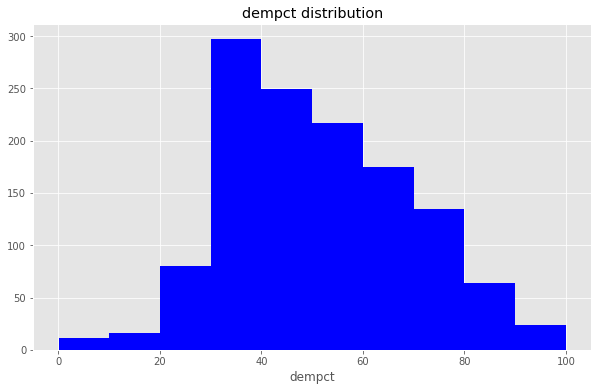

In [13]:
#compare distribution before and after bc
fig = plt.figure(figsize=(10,6))
plt.hist(df.pctDem, color = 'b')
plt.xlabel('dempct')
plt.title('dempct distribution')
plt.show()

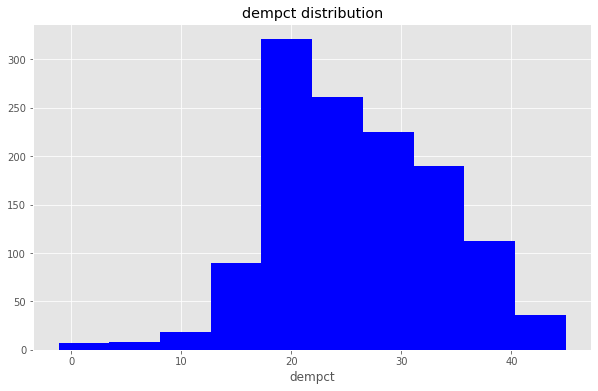

In [14]:
fig = plt.figure(figsize=(10,6))
plt.hist(xf, color = 'b')
plt.xlabel('dempct')
plt.title('dempct distribution')
plt.show()

In [15]:
df['pctDem'] = xf
df = df.drop('pct_won', axis =1)
df['walkedplus'] = df['Walked'] + df['Other_means']

In [16]:
df = df.drop(['Other_means', 'Walked'], axis = 1)

In [17]:
df.to_csv('wholedata2.csv')

No handles with labels found to put in legend.


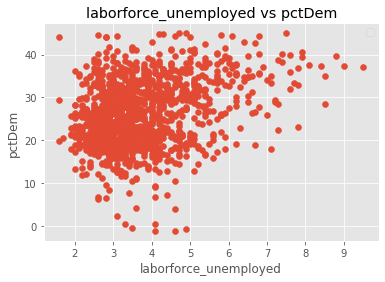

No handles with labels found to put in legend.


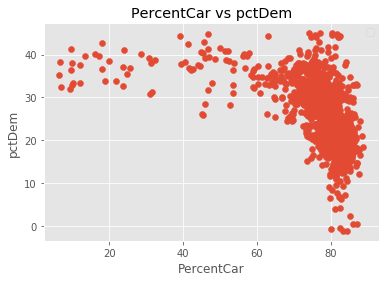

No handles with labels found to put in legend.


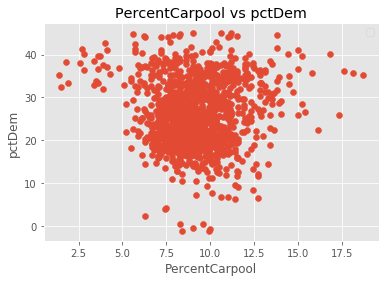

No handles with labels found to put in legend.


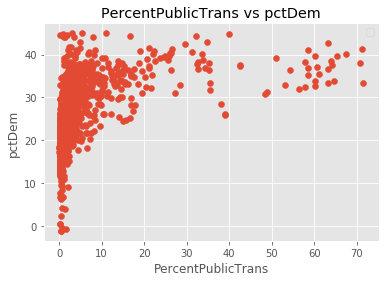

No handles with labels found to put in legend.


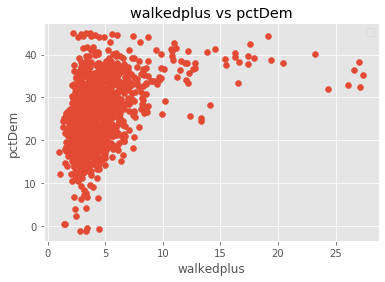

No handles with labels found to put in legend.


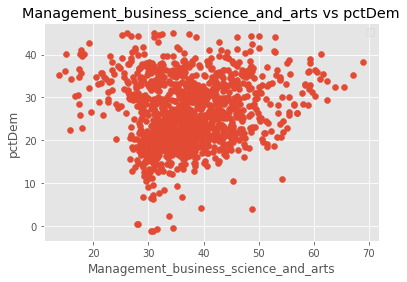

No handles with labels found to put in legend.


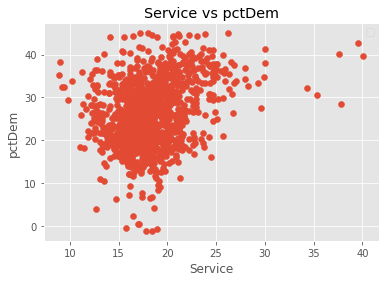

No handles with labels found to put in legend.


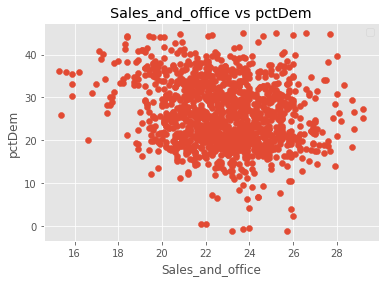

No handles with labels found to put in legend.


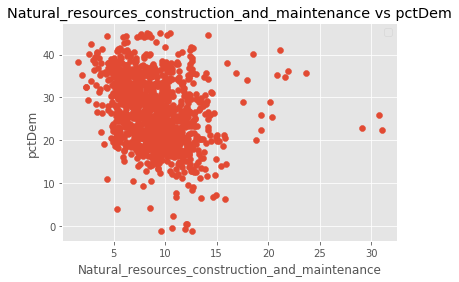

No handles with labels found to put in legend.


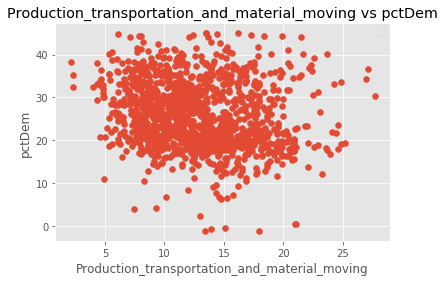

No handles with labels found to put in legend.


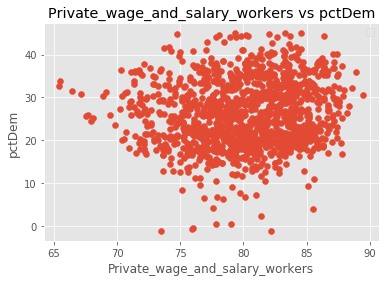

No handles with labels found to put in legend.


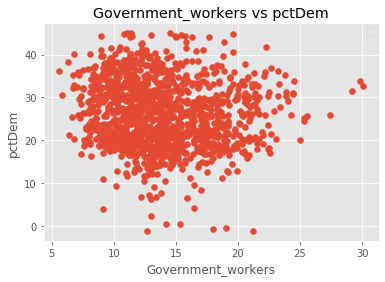

No handles with labels found to put in legend.


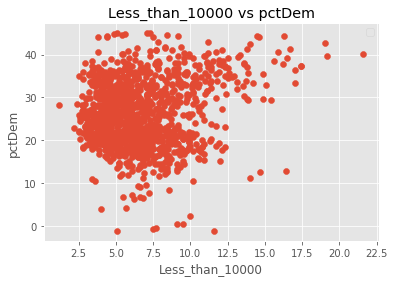

No handles with labels found to put in legend.


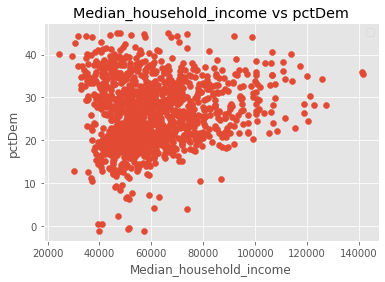

No handles with labels found to put in legend.


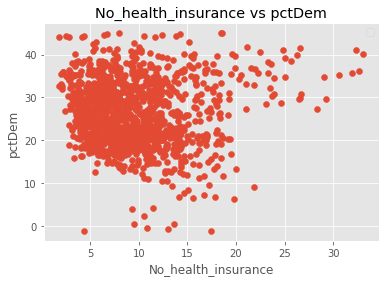

No handles with labels found to put in legend.


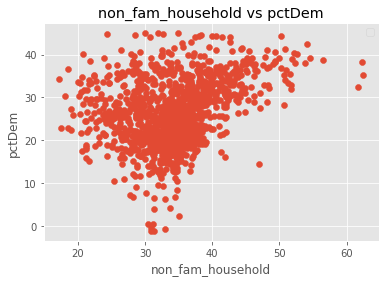

No handles with labels found to put in legend.


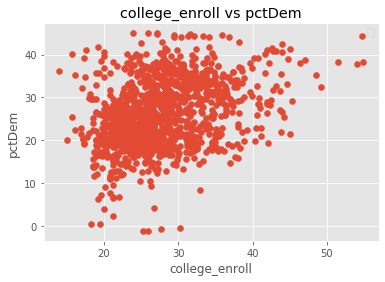

No handles with labels found to put in legend.


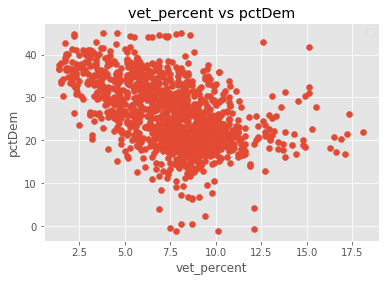

No handles with labels found to put in legend.


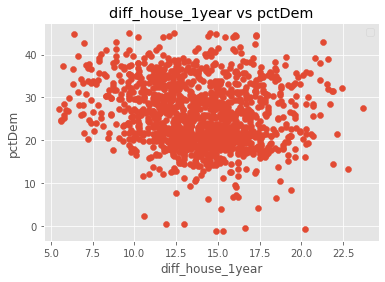

No handles with labels found to put in legend.


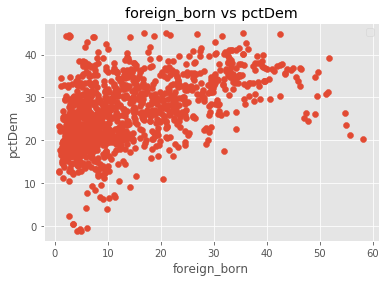

No handles with labels found to put in legend.


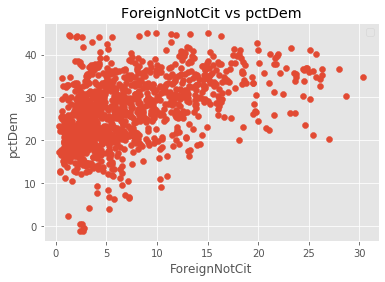

No handles with labels found to put in legend.


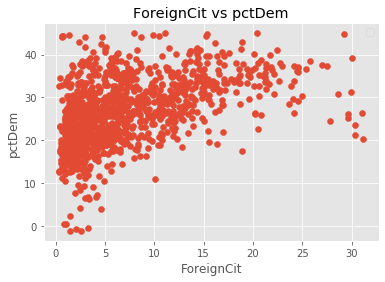

No handles with labels found to put in legend.


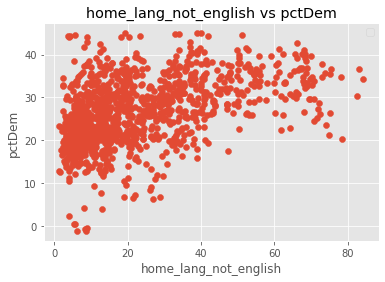

No handles with labels found to put in legend.


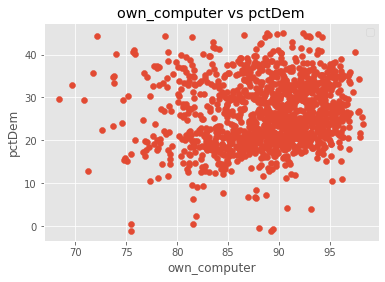

No handles with labels found to put in legend.


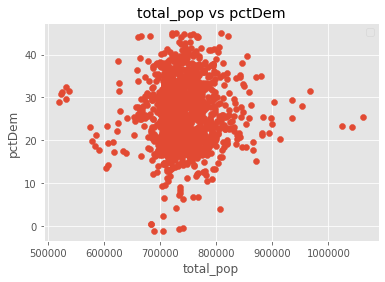

No handles with labels found to put in legend.


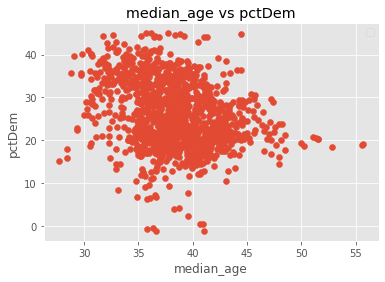

No handles with labels found to put in legend.


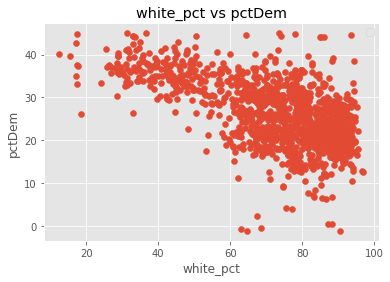

No handles with labels found to put in legend.


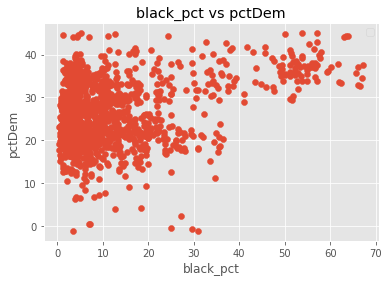

No handles with labels found to put in legend.


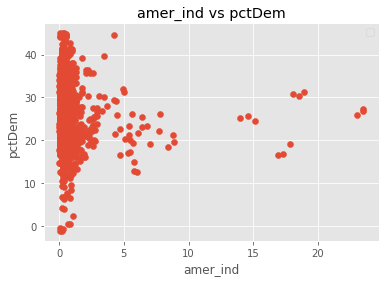

No handles with labels found to put in legend.


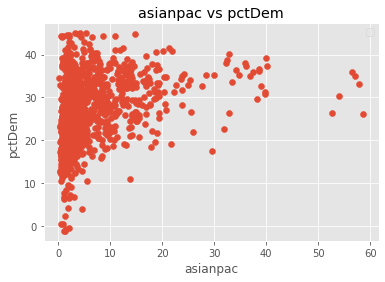

No handles with labels found to put in legend.


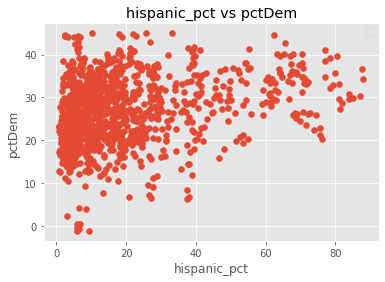

No handles with labels found to put in legend.


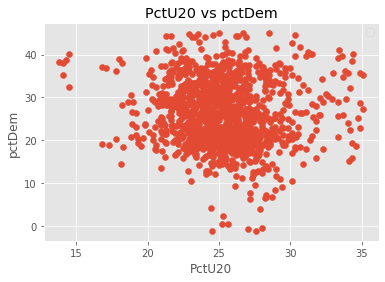

No handles with labels found to put in legend.


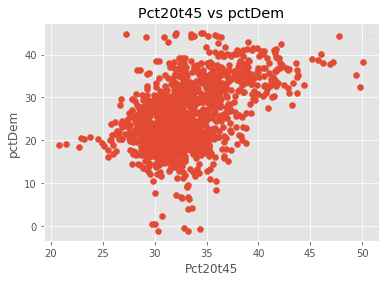

No handles with labels found to put in legend.


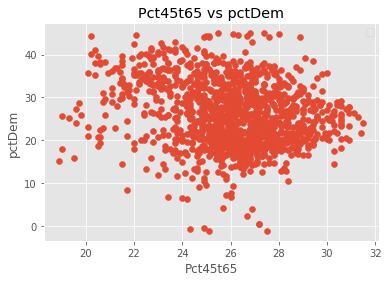

No handles with labels found to put in legend.


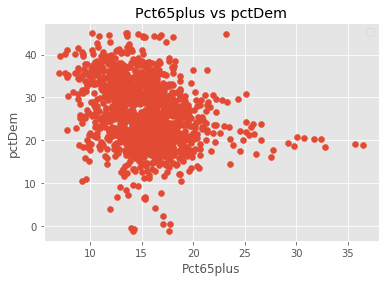

No handles with labels found to put in legend.


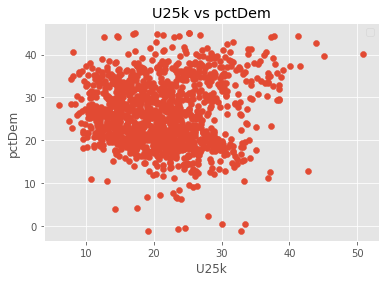

No handles with labels found to put in legend.


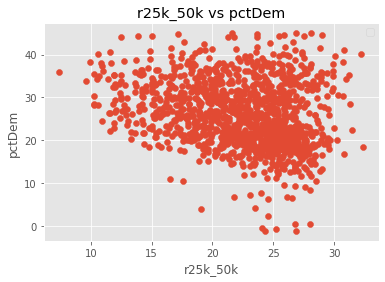

No handles with labels found to put in legend.


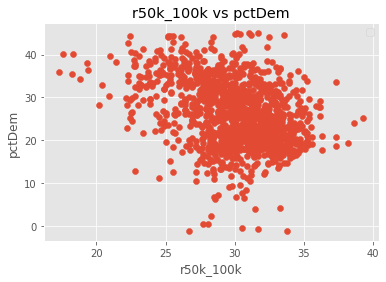

No handles with labels found to put in legend.


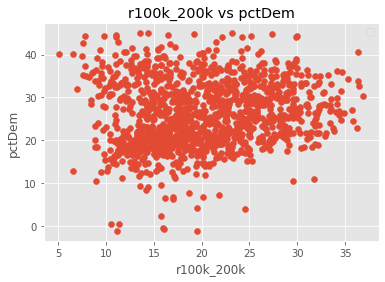

No handles with labels found to put in legend.


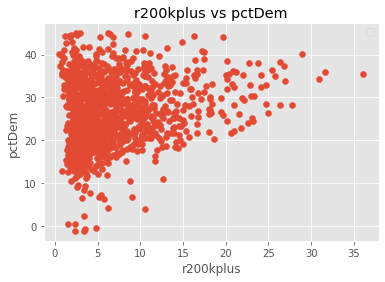

No handles with labels found to put in legend.


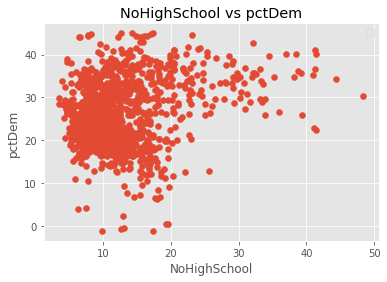

No handles with labels found to put in legend.


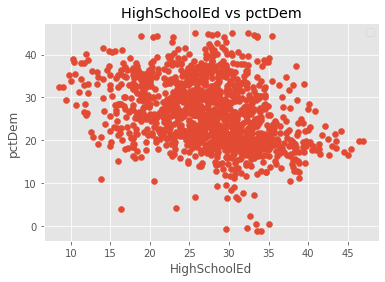

No handles with labels found to put in legend.


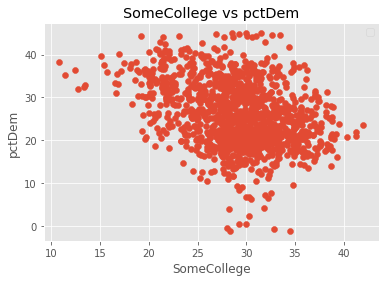

No handles with labels found to put in legend.


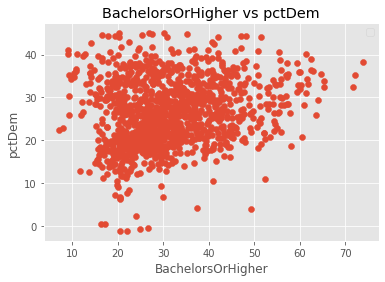

In [18]:
#plot against pctDem
x_col = 'pctDem'
y_columns = ['laborforce_unemployed','PercentCar','PercentCarpool','PercentPublicTrans','walkedplus','Management_business_science_and_arts', \
             'Service','Sales_and_office','Natural_resources_construction_and_maintenance','Production_transportation_and_material_moving', \
             'Private_wage_and_salary_workers','Government_workers','Less_than_10000','Median_household_income','No_health_insurance', \
             'non_fam_household','college_enroll','vet_percent','diff_house_1year','foreign_born','ForeignNotCit','ForeignCit', \
             'home_lang_not_english','own_computer','total_pop','median_age','white_pct','black_pct','amer_ind','asianpac', \
             'hispanic_pct','PctU20','Pct20t45','Pct45t65','Pct65plus','U25k','r25k_50k','r50k_100k','r100k_200k','r200kplus','NoHighSchool', \
             'HighSchoolEd','SomeCollege','BachelorsOrHigher']

for y_col in y_columns:

    figure = plt.figure
    ax = plt.gca()
    ax.scatter(df[y_col], df[x_col])
    ax.set_xlabel(y_col)
    ax.set_ylabel(x_col)
    ax.set_title("{} vs {}".format(y_col, x_col))

    plt.legend()
    plt.show()

In [19]:
#correlation values
cor = df.corr()
cor_target = cor["pctDem"]
relevant_features = cor_target.sort_values(ascending=False)
relevant_features

pctDem                                            1.000000
foreign_born                                      0.517379
ForeignNotCit                                     0.493782
ForeignCit                                        0.491889
home_lang_not_english                             0.482119
Pct20t45                                          0.477758
PercentPublicTrans                                0.453246
walkedplus                                        0.415251
college_enroll                                    0.365791
black_pct                                         0.359403
asianpac                                          0.344048
hispanic_pct                                      0.317671
Service                                           0.316817
laborforce_unemployed                             0.315003
non_fam_household                                 0.291702
r200kplus                                         0.229986
NoHighSchool                                      0.2255

In [20]:
#looking for correlation between district Area and pctDem
bigdf = pd.concat([Areas, df], axis =1)

In [21]:
bigdf['LandArea'] = bigdf['Land area (square miles)']

In [22]:
bigdf['LandArea'] = bigdf['LandArea'].str.replace(',', '').astype(float)
bigdf.total_pop

0       696783.0
1       678622.0
2       706574.0
3       683372.0
4       706373.0
          ...   
1300    714886.0
1301    735997.0
1302    584153.0
1303    585501.0
1304    577737.0
Name: total_pop, Length: 1305, dtype: float64

In [23]:
bigdf['pop_dens'] = bigdf['total_pop']/bigdf['LandArea']

No handles with labels found to put in legend.


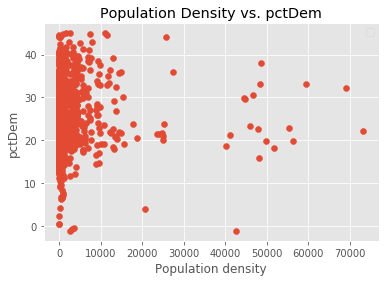

In [24]:
figure = plt.figure
ax = plt.gca()
ax.scatter(bigdf['pop_dens'], bigdf['pctDem'])
ax.set_xlabel('Population density')
ax.set_ylabel('pctDem')
ax.set_title("Population Density vs. pctDem")

plt.legend()
plt.show()

In [46]:
fig = px.scatter(df,'vet_percent', 'r50k_100k', color = 'party', symbol = 'party')

fig.show()

In [25]:
corb = bigdf.corr()
corb['pctDem']['pop_dens']

0.0016848954490692703

In [43]:
#EDA showing relationship between features and pctDem
import plotly.express as px
fig = px.scatter_matrix(df, dimensions = ['foreign_born', 'Pct20t45', 'PercentPublicTrans'], color = 'party', symbol = 'party')
fig.show()

In [44]:
fig = px.scatter_matrix(df, dimensions = ['white_pct', 'PercentCar', 'vet_percent', 'r50k_100k'], color = 'party', symbol = 'party')
fig.show()

In [31]:
fig = px.scatter_matrix(df, dimensions = ['black_pct', 'college_enroll', 'walkedplus', 'asianpac'], color = 'party', symbol = 'party')
fig.show()

In [32]:
fig = px.scatter_matrix(df, dimensions = ['own_computer', 'total_pop', 'U25k', 'No_health_insurance'], color = 'party', symbol = 'party')
fig.show()